# 3D HYDRODYNAMIC SIMULATIONS OF C INGESTION INTO A CONVECTIVE O SHELL

In [1]:
import sys
sys.path.insert(0, '/user/jericho/PyPPM')
from ppmpy.ppm import *
%matplotlib nbagg
import numpy as np
import nugridpy.mesa as ms
import nugridpy.utils as utils
sys.path.insert(0,'/data/ppm_rpod2/lib/lcse/')
import rprofile as rprofile
%load_ext autoreload
%autoreload 2
cb = utils.colourblind

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time
<type 'str'>
<class 'future.types.newstr.newstr'>
True
 , 0.000
True
 , 0.000
True
 , 0.167


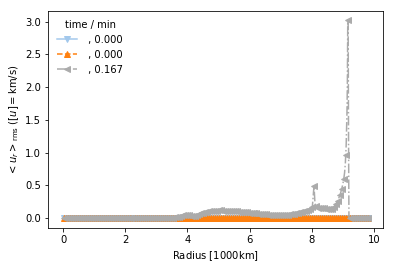

In [11]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '/home/user/PyPPM/')
from ppmpy import ppm
data_dir = '/data/ppm_rpod2/YProfiles/'
project = 'O-shell-M25'
ppm.set_YProf_path(data_dir+project)
            

D2 = ppm.yprofile('D2')
D2.prof_time([0,5,10],logy=False,num_type='time') 

time
<class 'str'>
<class 'str'>
p
True
 , 0.000
True
 , 5.000
True
 , 10.000


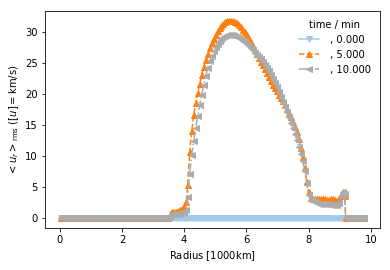

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '/home/user/PyPPM/')
from ppmpy import ppm
data_dir = '/data/ppm_rpod2/YProfiles/'
project = 'O-shell-M25'
ppm.set_YProf_path(data_dir+project)
            

D2 = ppm.yprofile('D2')
D2.prof_time([0,5,10],logy=False,num_type='time') 

/bin/sh: 1: sphinx: not found


In [4]:
nt = 'time'
print(nt is 'time')

True


In [2]:
Q = 9.35 # Q factor of C12+C12
airmu = 1.848 # mu of convective fluid
cldmu = 1.802 # mu of entrained fluid
fkcld = 1.87e-1 # number fraction of C12 in the entrained fluid
AtomicNocld = 16.6 # average mass number in the entrained fluid

def T9_func(yprof, fname, numtype='ndump', resolution='l'):
    T9 = yprof.get('T9', fname=fname, numtype=numtype, \
                   resolution=resolution, airmu=airmu, \
                   cldmu=cldmu, silent=True)
    T9 = 1.022*T9**0.64
    T9 = T9*0.5*(1. - np.tanh(2e2*(T9 - 2.240)))
    
    return T9

yprof = yprofile('/data/ppm_rpod2/YProfiles/C-ingestion/I14',filename_offset=-1)
rp_set = rprofile.rprofile_set('/data/ppm_rpod2/RProfiles/C-ingestion/I14')
dumps = np.array(range(50,250, 1))

r1=7.5;r2=9
burnt = yprof.plot_entrainment_rates(rp_set,dumps,r1,r2,T9_func=T9_func,Q=Q,cldmu=cldmu,fkcld=fkcld,
                             AtomicNocld=AtomicNocld,airmu=airmu,return_burnt=True)

TypeError: plot_entrainment_rates() got an unexpected keyword argument 'T9_func'

<IPython.core.display.Javascript object>


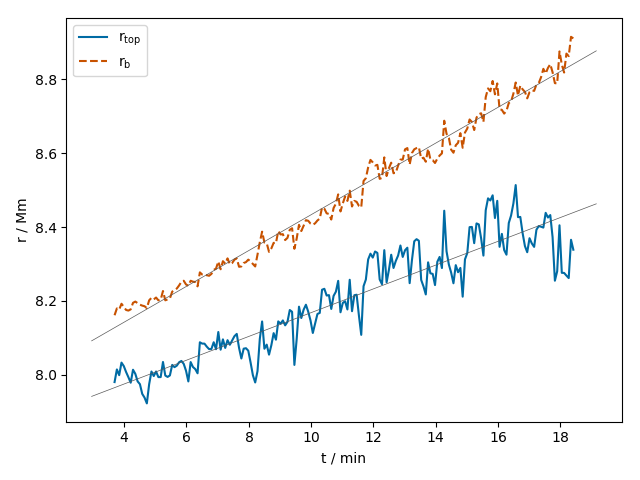

<IPython.core.display.Javascript object>


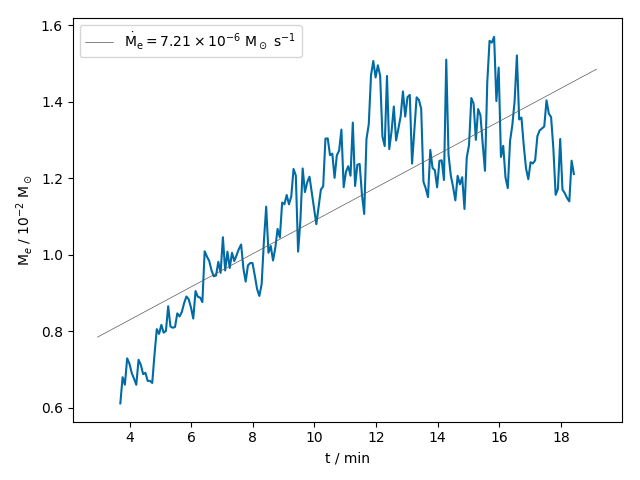

array([ 0.00611484,  0.00680022,  0.00660297,  0.00729292,  0.00715401,
        0.00691127,  0.00676263,  0.00660209,  0.00725459,  0.00712242,
        0.00687945,  0.00691373,  0.00670328,  0.00670426,  0.00664962,
        0.00739633,  0.00805692,  0.00793204,  0.00816789,  0.00796533,
        0.00800688,  0.00865494,  0.00812478,  0.00809264,  0.00811396,
        0.00846904,  0.00838905,  0.00850885,  0.00874   ,  0.00891013,
        0.00883796,  0.00862233,  0.00833302,  0.00905224,  0.00890367,
        0.0088828 ,  0.00876343,  0.01009139,  0.00995389,  0.00984006,
        0.0095944 ,  0.00943839,  0.00946042,  0.00981721,  0.00952872,
        0.01046081,  0.00959071,  0.01008256,  0.00965733,  0.01005323,
        0.00983818,  0.00999015,  0.01015045,  0.0102697 ,  0.00964276,
        0.00930011,  0.00972554,  0.0097848 ,  0.00978528,  0.00945714,
        0.00910878,  0.00892441,  0.0092301 ,  0.01036105,  0.01125976,
        0.01005366,  0.01023129,  0.00985258,  0.01017951,  0.01

In [63]:
yprof.entrainment_rate(dumps, 7.5, 9., var='vxz', criterion='min_grad', offset=-1., \
                               integrate_both_fluids=False, show_output=True, \
                               ifig0=3, return_time_series=True)

# Fig 1

In [2]:
hd = ms.history_data("/data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS/")

Using old star.logsa file ...
 reading ...100% 



 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


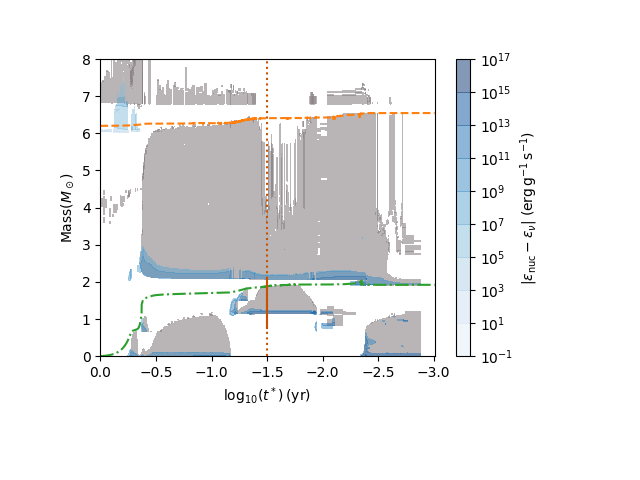

plot versus time left
plotting contours


/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [3]:
modstart = 16850;modstop = 36680
xres = 1000;yres = 1000
ylims = [0., 8.]
hd.kip_cont(ifig = 1, modstart = modstart, modstop = modstop, \
            xres = xres, yres = yres, ylims = ylims, c12_boundary=True, \
            outlines=False, ixaxis = 'log_time_left', plot_radius=False)
log10_t0 = -1.5
pl.axvline(x=log10_t0, ls=':', color=cb(8))
x = np.array([log10_t0, log10_t0])
y = np.array([0.75, 2.1])
pl.plot(x, y, '-', color=cb(8))
pl.tight_layout()

## Fig 2

## Fig 3

<IPython.core.display.Javascript object>


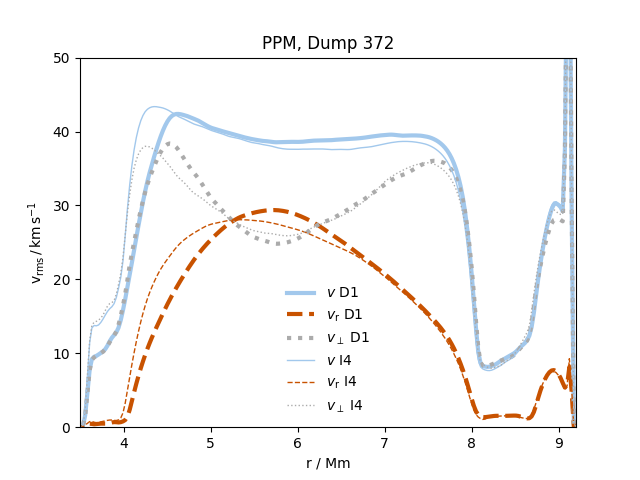

In [29]:
D1 = yprofile('/data/ppm_rpod2/YProfiles/O-shell-M25/D1')
I4 = yprofile('/data/ppm_rpod2/YProfiles/C-ingestion/I4')
D1.vprofs( [240,330],fname_type = 'range', initial_conv_boundaries = False, ifig = 3, lw=3.,run='D1')
I4.vprofs( [270,372],fname_type = 'range', initial_conv_boundaries = False,
          ifig = 3, lw=1.,run='I4',lims=[3.5,9.2,0,50])

## Fig 4

<IPython.core.display.Javascript object>


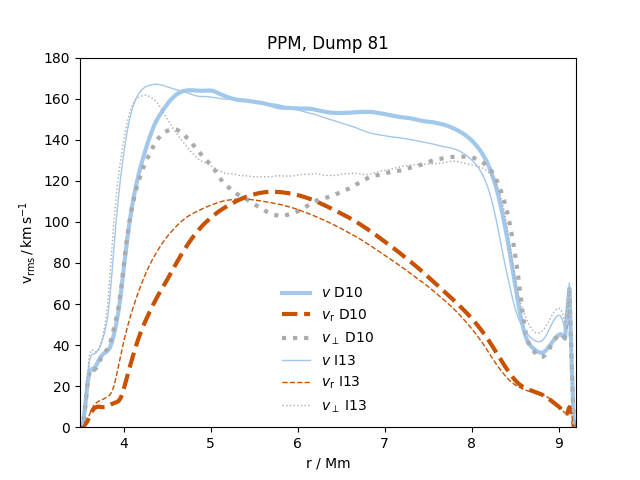

In [28]:
D10 = yprofile('/data/ppm_rpod2/YProfiles/O-shell-M25/D10')
I13 = yprofile('/data/ppm_rpod2/YProfiles/C-ingestion/I13')
D10.vprofs( [48,72],fname_type = 'range', initial_conv_boundaries = False, ifig = 4, lw=3.,run='D10')
I13.vprofs( [54,81],fname_type = 'range', initial_conv_boundaries = False,
          ifig = 4, lw=1.,run='I13',lims=[3.5,9.2,0,180])

## Fig 8

<IPython.core.display.Javascript object>


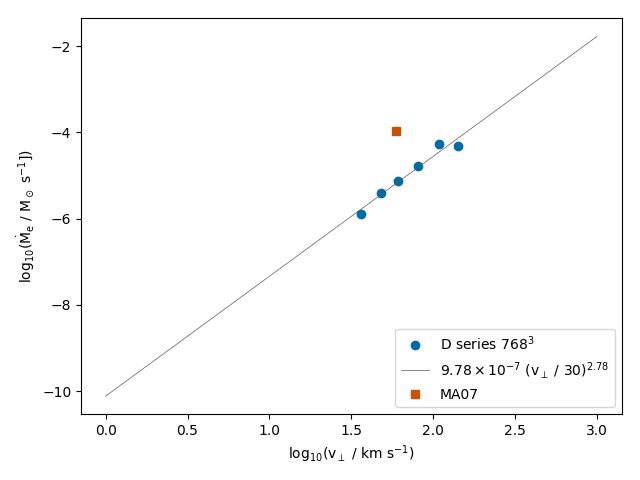

In [11]:
set_YProf_path('/data/ppm_rpod2/YProfiles/O-shell-M25/')
cases = ('D1', 'D8', 'D5', 'D6', 'D9', 'D10')
c0 = (241,154,142,155,123,78)  
plot_entr_v_ut(cases,c0,10,7.5,8.5,'tangential','max','D series $768^3$',ifig = 8,
                  integrate_both_fluids = False)

In [ ]:
cases = ('D1', 'D8', 'D5', 'D6', 'D9', 'D10')
c0 = (241,154,142,155,123,78)  
plot_entr_v_ut(cases,c0,10,10,7.5,8.5,'tangential','max','I series $768^3$',ifig0 = 8,
                  integrate_both_fluids = False)

## Fig 12

In [32]:
yprof = yprofile('/data/ppm_rpod2/YProfiles/C-ingestion/I14')
dumps = np.array(range(3,200, 1))
r1 = yprof.radbase - 1
r2 = yprof.radtop + 1
print(r1, r2)

r1=7.5;r2=8.5
yprof.plot_entrainment_rates(dumps,r1,r2)

(3.1296999999999997, 9.0848)


In [1]:
import nugridpy
nugridpy?